<a href="https://colab.research.google.com/github/kauercurtis/CS-325-Algorithms/blob/main/CS_325_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
<Curtis Kauer>
<kauerc@oregonstate.edu>
Programming Exercise 1
CS 325 Algorithms Spring 2023
```





---


**Part Zero**: Front matter and helper functions

Read over this code. You should not make any changes.


---



In [ ]:
# import libraries
import time
from numpy.random import seed
from numpy.random import randint
import matplotlib.pyplot as plt

In [ ]:
# GLOBAL VARIABLES

# lists to store functions and their names (string)
f_list = []
f_name_list = []

In [ ]:
# DATA GENERATION

# function to generate a random list
def random_list(max):
  return randint(0, max, max)

# function to generate a semi-sorted list
def semisorted_list(max):
  last = 0
  lst = []
  for i in range(max):
    cur = randint(-1,5) + last
    lst.append(cur)
    last = cur
  return lst

# function to generate a sorted list
def sorted_list(max):
  return list(range(0, max))

# function to generate a backwards sorted list
def reversed_list(max):
  lst = list(range(0, max))
  lst.reverse()
  return lst

In [ ]:
# EXPERIMENT AND GRAPHING

# function that runs a set of functions, times their output, and
#    graphs time vs input size
def time_algorithms(data_f, fs, fnames, experiment):
  if len(fs)!=len(fnames):
    print("Error: functions and name lists must be the same size!")
    return;

  fcount = 0
  # initialize graph
  fig, ax1 = plt.subplots()
  ax1.set_title(experiment)
  ax1.set_xlabel('n')
  ax1.set_ylabel('time (s)')

  # for each sorting algorithm
  for f in fs:
    # randomly generates list of different sizes
    elements = list()
    times = list()
    # run 10 iterations of the experiment
    for i in range(1, 11):

        # generate some data
        lst = data_f(50 * i)

        # run the algorithm and time it
        start = time.process_time()
        f(lst)
        end = time.process_time()

        # save results for graphing
        elements.append(len(lst))
        times.append(end-start)

    # graph the complexity
    ax1.plot(elements, times, label = fnames[fcount])
    fcount = fcount + 1

  # display the graph
  ax1.grid()
  ax1.legend()
  fig.show()



---


**Part One**: Implement sorting algorithms

For each of the following sorting algorithms, complete the code. It is recommended that you consult the pseudocode on Wikipedia for each algorithm.

You may write additional helper functions where necessary. Comment your code!


---



**Exercise 1: Insertion Sort**

Implement insertion sort based on pseudocode from textbook or [Wikipedia](https://en.wikipedia.org/wiki/Insertion_sort)


In [ ]:
#swapList - helper function that swaps two values in a list
#param1 - lst - the list
#param2 - pos1 - index of the first value
#param3 - pos2 - index of the second value
def swapList(lst, pos1, pos2):
    temp = lst[pos1];
    lst[pos1] = lst[pos2];
    lst[pos2] = temp;

# implementation of insertion sort
#insertion_Sort - sorts a list by insertion
#param1 - lst - the list to sort
#assumes index 0 is the lowest value
#if new lowest value is found, swaps values
#Uses swapList() helper function
def insertion_sort(lst):
#your code here
  index = 1;
  while index < len(lst):
    currentIndex = index;
    while currentIndex > 0 and lst[currentIndex - 1] > lst[currentIndex]:
      swapList(lst, currentIndex - 1, currentIndex);
      currentIndex = currentIndex - 1;
    else:
      index = index + 1;
# add the function to the function list
f_list.append(insertion_sort)
f_name_list.append("Insertion Sort")

**Exercise 2: Selection Sort**

Implement selection sort based on pseudocode from textbook or [Wikipedia](https://en.wikipedia.org/wiki/Selection_sort)



In [ ]:
# implementation of selection sort
#selection_sort - sorts a list by selection
#param1 - lst - the list to sort
#assumes the first index is the smallest value
#swaps if a new smallest value is found
#uses swapList() helper function
def selection_sort(lst):
# your code here
  for index in range(0, len(lst)):
    smallestIndex = index;
    for currentIndex in range(index + 1, len(lst)):
      if lst[currentIndex] < lst[smallestIndex]:
        smallestIndex = currentIndex;

    if(smallestIndex != index):
      swapList(lst, index, smallestIndex);
# add the function to the function list
f_list.append(selection_sort)
f_name_list.append("Selection Sort")

**Exercise 3: Quicksort**

Implement quicksort based on pseudocode from textbook or [Wikipedia](https://en.wikipedia.org/wiki/Quicksort).

In [ ]:
#partition - parts a list into seperate subsets
#param1 - lst - the list to part
#param2 - lowIndex - the beginning index of the list
#param3 - highIndex - the last index of the list
#return - returns the position of the new pivot
#uses swapList() helper function
def partition(lst, lowIndex, highIndex):
  highIndex = highIndex - 1;
#assumes the pivot is the highestIndex of the list
  pivot = lst[highIndex];

  index = lowIndex - 1;

  for currentIndex in range(lowIndex, highIndex):
    if lst[currentIndex] <= pivot:
      index = index + 1;
      swapList(lst, index, currentIndex);
    swapList(lst, index + 1, highIndex);

  return index + 1;

#quick_sort - recursively sorts a list
#param1 - lst - the list to sort
#param2 - leftBound - the left most index position
#param3 - rightBound - the right most index position
#uses partition() helper function
def quick_sort(lst, leftBound, rightBound):
  if leftBound > rightBound:
    return;

  pivot = partition(lst, leftBound, rightBound);
  quick_sort(lst, leftBound, pivot - 1);
  quick_sort(lst, pivot + 1, rightBound);


# implementation of quick sort
def quicksort(lst):
  quick_sort(lst, 0, len(lst));

# add the function to the function list
f_list.append(quicksort)
f_name_list.append("Quicksort")


**Exercise 4: Mergesort**

Implement mergesort based on pseudocode from textbook or [Wikipedia](https://en.wikipedia.org/wiki/Merge_sort).

In [ ]:
#copyList - copy's the content from one list to another based on starting index and length
#param1 - lst1 - list to copy from
#param2 - lst2 - the list to copy to
#param3 - startingIndex - the index position to start copying from
#param4 - size - the # of elements copied from lst1
def copyList(lst1, lst2, startingIndex, size):
    index = 0;
    while index < size:
        currLstIndex = startingIndex + index;
        value = lst1[int(currLstIndex)];
        #lst2.append(int(value));
        lst2[index] = int(value);
        index = index + 1;

#merge - sorts a list by creating sublists
#param1 - lst - the list to sort
#param2 - leftBound - the leftmost index position to start sorting
#param3 - middleIndex - the middle of the array of elements to sort
#param4 - rightBound - the rightmost index position to sort
#uses copyList() helper function
def merge(lst, leftBound, middleIndex, rightBound):
#I originally wrote all these functions in c++ to get a better understanding of them
#For some reason python specifically wanted the rightBound and middleIndex to be decremented
#My only guess is that its an IDE thing
    rightBound = rightBound - 1;
    middleIndex = middleIndex - 1;
#sizes of the two subLists
    subOneSize = (middleIndex - leftBound) + 1;
    subTwoSize = rightBound - middleIndex;

    lst1 = [None] * subOneSize;
    lst2 = [None] * subTwoSize;
#copy elements of lst to subLists
    copyList(lst, lst1, leftBound, subOneSize);
    copyList(lst, lst2, middleIndex + 1, subTwoSize);
#variables to traverse & sort the subLists into one list
    currentIndexSubOne = 0;
    currentIndexSubTwo = 0;
    currentIndexMerged = leftBound;
#traverse and merge sublists into one list
    while currentIndexSubOne < subOneSize and currentIndexSubTwo < subTwoSize:
        if lst1[currentIndexSubOne] <= lst2[currentIndexSubTwo]:
            lst[currentIndexMerged] = lst1[currentIndexSubOne];
            currentIndexSubOne = currentIndexSubOne + 1;
        else:
            lst[currentIndexMerged] = lst2[currentIndexSubTwo];
            currentIndexSubTwo = currentIndexSubTwo + 1;

        currentIndexMerged = currentIndexMerged + 1;

    while currentIndexSubOne < subOneSize:
        lst[currentIndexMerged] = lst1[currentIndexSubOne];
        currentIndexSubOne = currentIndexSubOne + 1;
        currentIndexMerged = currentIndexMerged + 1;

    while currentIndexSubTwo < subTwoSize:
        lst[currentIndexMerged] = lst2[currentIndexSubTwo];
        currentIndexSubTwo = currentIndexSubTwo + 1;
        currentIndexMerged = currentIndexMerged + 1;

#merge_Sort - recursively sorts an array by dividing into sublists
#param1 - lst - the list to sort
#param2 - leftBound - the leftmost index position to sort from
#param3 - rightBound - the rightmost index position to sort to
#uses merge() function
def merge_Sort(lst, leftBound, rightBound):
    if leftBound >= rightBound:
        return;

    middleIndex = (leftBound + rightBound) / 2;
    middleIndex = int(middleIndex);
    merge_Sort(lst, leftBound, middleIndex);
    merge_Sort(lst, middleIndex + 1, rightBound);
    merge(lst, leftBound, middleIndex, rightBound);

# implementation of merge sort
def mergesort(lst):
  merge_Sort(lst, 0, len(lst));

# add the function to the function list
f_list.append(mergesort)
f_name_list.append("Mergesort")

**Exercise 5: Pick a Sorting Algorithm**

Choose a sorting algorithm from this list on [Wikipedia](https://en.wikipedia.org/wiki/Sorting_algorithm) and implement it.

You may not repeat variants of any of the above sorting algorithms. You may not choose Bubblesort nor Bogosort.

In [ ]:
#heapify - sorts a given subtree/list to have properties of a min tree
#param1 - lst - the list to sort
#param2 - size - the # of nodes of the tree to swap
#param3 - index - the parent node of the subtree to sort
#uses swapList() helper function
#if the max value of the subtree is not the parent, recursively sorts itself
def heapify(lst, size, index):
    max = index;
    left = (2 * index) + 1;
    right = (2 * index) + 2;

    if left < size and lst[left] > lst[max]:
        max = left;

    if right < size and lst[right] > lst[max]:
        max = right;

    if max != index:
        swapList(lst, index, max);
        heapify(lst, size, max);

# implementation of [heapSort]
#heapSort - sorts a lst by giving it properties of a binary min tree
#param1 - lst - the list to sort
#uses heapify() function
def heapSort(lst):
    index = (len(lst) / 2) - 1;
    index = int(index);
    while index >= 0:
        heapify(lst, len(lst), index);
        index = index - 1;

    index = len(lst) - 1;
    while index >= 0:
        swapList(lst, 0, index);
        heapify(lst, index, 0);
        index = index - 1;

# update the variable and algorithm name below
# add the function to the function list
f_list.append(heapSort)
f_name_list.append("Heap Sort")       # Update with the name

**EXTRA CREDIT**

Add a code block below and implement another sorting algorithm that either:
1.   has complexity O(n log n) or better for the average case, or
2.   from the list non-comparison sorts on [Wikipedia](https://en.wikipedia.org/wiki/Sorting_algorithm#Non-comparison_sorts)



Remember to add the function to the function list so that it will be graphed.

Your extra credit sorting algorithm is worth \[+5 Points]. Detailed comments are expected for full credit.



---


**Part Two**: Experimental Analysis

In this section, you do not have to write any more code. You will test your sorting algorithms above to understand each algorithm's respective behavior under different conditions.

Below are four code blocks. Each will run your sorting algorithms on a different set of data and produce a graph of time vs. input size. Run each block several times to observe the consistant behavior of each sorting algorithm (despite variances of individual trials).

Below each output, you will write a short paragraph discussing your results.


---







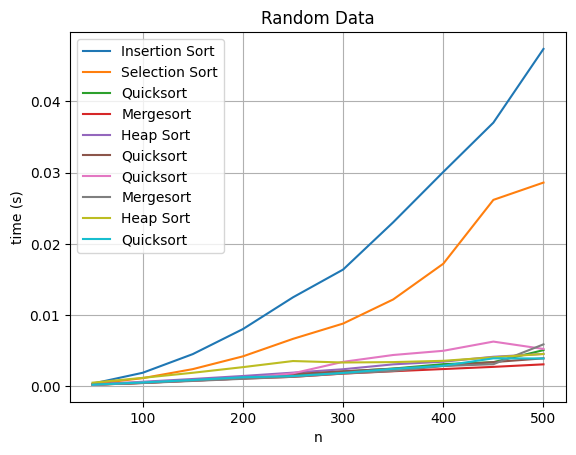

In [ ]:
#@title Default title text
# run the sorting algorithms on random data
time_algorithms(random_list, f_list, f_name_list, 'Random Data')


**Analysis A: Sorting a Random List**

*Write a short paragraph discussing your results.*

With Random values, the worst in time is insertion sort with almost .05 seconds when n = 500. Selection Sort is a the second longest with almost .03 seconds at n = 500 but is a sort of median between the slowest and the fastest. The other algorithms are very similar with an average of about .005 seconds at n = 500 with quicksort being the slowest out of them.

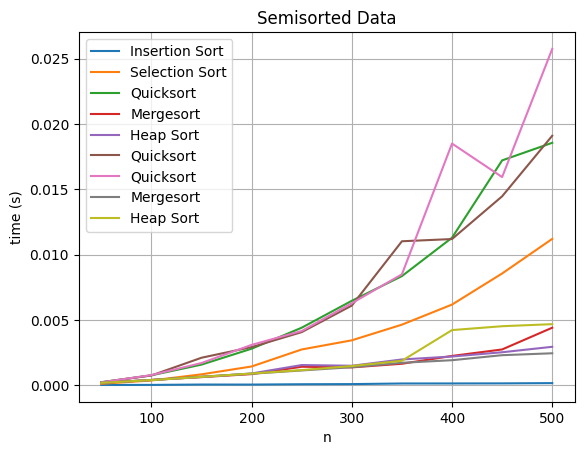

In [ ]:
# run the sorting algorithms on data that is nearly sorted
time_algorithms(semisorted_list, f_list, f_name_list, 'Semisorted Data')


**Analysis B: Almost-Sorted List**

*Write a short paragraph discussing your results.*

With semisorted values, Quicksort is the slowest which is different then what I predicted. Insertion is actually the fastest with almost 0.000 seconds when n = 500. Selection sort seems to be almost consistent with the random data graph to being a median between the slowest and fastest.

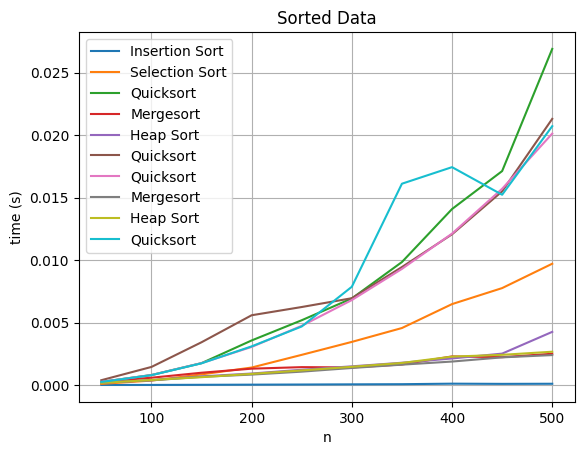

In [ ]:
# run the sorting algorithms on already sorted data
time_algorithms(sorted_list, f_list, f_name_list, 'Sorted Data')


**Analysis C: Sorted List**

*Write a short paragraph discussing your results.*
Insertion sort is the fastest with already sorted values. It appears that heap sort and merge sort are almost equal in speed. The one lagging behind is quicksort. Selection sort is still a median between slow and fast.

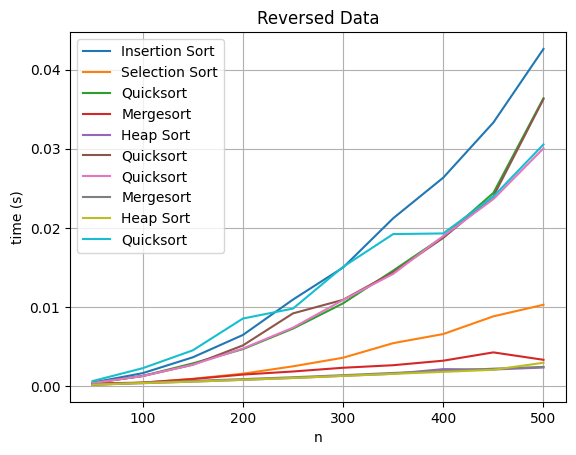

In [ ]:
# run the sorting algorithms on data perfectly reversed
time_algorithms(reversed_list, f_list, f_name_list, 'Reversed Data')


**Analysis D: Reversed List**

*Write a short paragraph discussing your results.*

Selection sort is back as a median between the fastest and the slowest. The fastest with reversed sorted values appears to be heap sort, and mergesort. Quicksort and insertion sort seem to be the slowest with reversed values.